<a href="https://colab.research.google.com/github/vivekastro/Deep_Learning_tutorial/blob/master/ASI__ML_workshop_Quasar_redshift_vivek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning workshop ASI-Meeting March 1 2023, IIT Indore.**
#**Hand-on Session- 1: Regression**
#Author : Vivek M. (vivek.m@iiap.res.in)

---

# **Goal of the project**
# The goal is to  use the SDSS DR16 quasar catalog to predict the redshift of unknown quasars.

We will use u,g,r,i,z magnitudes and the corresponding extinction values to build a regresson model that can predict the redshift of quasars.

# **Importing the data in google colab**
One  way to import the data is to upload the file in your google drive and then access it using the following commands.
As that process will take time and is likely to create confusion among the participants, we will use a short-cut.

For this session, I have uploaded the datafile in my website and we will directly read that file using pandas

In [37]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#!ls -ltr "/content/gdrive/MyDrive/"



# **Reading the data using pandas**


---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://ff6b8c1c-c22c-4c69-b34c-fa3dbd3e97b5.filesusr.com/ugd/9f63fe_51f323a9cdc4405a91fa58fbb4011dff.csv?dn=DR16Q_NonBALs_ASIML.csv')

# **Explore the dataset**
Note that the PSFMAG and EXTINCTION parameters are given as tuples.  We will have to split thpse tuples in to individual parameters.

In [5]:
df.head()

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,Z_VI,BAL_PROB,PSFMAG,EXTINCTION
0,000000.36+070350.8,0.001535,7.064129,11279,58449,978,-1.000,0.0,"(22.517344, 22.102839, 21.854153, 21.637999, 2...","(0.2439438, 0.19007935, 0.13149601, 0.09771563..."
1,000000.36+274356.2,0.001526,27.732283,7695,57654,565,-1.000,0.0,"(22.347525, 21.903051, 21.752844, 21.663532, 2...","(0.26307732, 0.20498806, 0.14180979, 0.1053798..."
2,000000.45+092308.2,0.001914,9.385637,11277,58450,705,-1.000,0.0,"(18.76644, 18.66274, 18.499794, 18.33653, 18.1...","(0.3726525, 0.29036832, 0.20087546, 0.149272, ..."
3,000000.45+174625.4,0.001898,17.773739,7596,56945,162,2.309,0.0,"(22.440338, 21.908857, 22.069986, 21.9268, 21....","(0.120217286, 0.09367249, 0.0648022, 0.0481549..."
4,000000.57+055630.8,0.002375,5.941903,8740,57367,694,-1.000,0.0,"(22.360628, 21.617563, 21.339863, 21.284025, 2...","(0.2338264, 0.18219595, 0.1260423, 0.09366295,..."


# **Redefining a new pandas DataFrame**

In [6]:
data = pd.DataFrame()
data['SDSS_NAME'] = df['SDSS_NAME']
data['RA'] = df['RA']
data['DEC'] = df['DEC']
data['PLATE'] = df['PLATE']
data['MJD']  = df['MJD']
data['FIBERID'] = df['FIBERID']
data['Z_VI'] = df['Z_VI']
data['U_MAG'] = [ float(df['PSFMAG'][i].split(',')[0].split('(')[1]) for i in range(len(df))]
data['G_MAG'] = [ float(df['PSFMAG'][i].split(',')[1]) for i in range(len(df))]
data['R_MAG'] = [ float(df['PSFMAG'][i].split(',')[2]) for i in range(len(df))]
data['I_MAG'] = [ float(df['PSFMAG'][i].split(',')[3]) for i in range(len(df))]
data['Z_MAG'] = [ float(df['PSFMAG'][i].split(',')[4].split(')')[0]) for i in range(len(df))]
data['U_EXT'] = [ float(df['EXTINCTION'][i].split(',')[0].split('(')[1]) for i in range(len(df))]
data['G_EXT'] = [ float(df['EXTINCTION'][i].split(',')[1]) for i in range(len(df))]
data['R_EXT'] = [ float(df['EXTINCTION'][i].split(',')[2]) for i in range(len(df))]
data['I_EXT'] = [ float(df['EXTINCTION'][i].split(',')[3]) for i in range(len(df))]
data['Z_EXT'] = [ float(df['EXTINCTION'][i].split(',')[4].split(')')[0]) for i in range(len(df))]

# **Printing the dataframe statistics**
Note that for some of the parameters there are -9999 values for eg, Z_VI, all magnitudes. These -9999 values are basically unreliable entries and need to be cleaned before any ML exercise 

In [7]:
data.describe()

,RA,DEC,PLATE,MJD,FIBERID,Z_VI,U_MAG,G_MAG,R_MAG,I_MAG,Z_MAG,U_EXT,G_EXT,R_EXT,I_EXT,Z_EXT
count,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000,313735.000000
mean,173.954111,26.922187,6818.956470,56631.852962,489.851783,0.890892,7.524906,6.838686,6.798738,6.639935,6.472456,-13.740433,-13.775167,-13.812056,-13.833456,-13.849546
std,96.468563,18.661531,2428.030883,1327.649008,286.119688,3.086172,375.430676,375.829885,374.548992,374.543068,374.536803,372.497887,372.496583,372.495201,372.494401,372.493799
min,0.001526,-17.520442,266.000000,51608.000000,1.000000,-999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,128.295141,10.255304,5130.000000,55944.000000,241.000000,-1.000000,20.837383,20.382509,20.236427,20.073541,19.913043,0.073076,0.056774,0.039370,0.029284,0.021729
50%,176.667804,28.107137,7081.000000,56605.000000,482.000000,1.830000,21.608994,21.110413,20.961191,20.797330,20.587574,0.119916,0.093157,0.064604,0.048061,0.035655
75%,228.314312,41.579164,8374.000000,57575.000000,736.000000,2.448000,22.282798,21.659397,21.535782,21.374689,21.156932,0.204027,0.158437,0.109905,0.081780,0.060646
max,359.999759,84.273694,11704.000000,58543.000000,1000.000000,7.007000,30.888962,26.311369,26.588125,29.951653,24.465014,3.031349,2.230438,1.617700,1.226652,0.869712


# **Histograms of parameters in the dataframe**
This is is nice way to explore the input parameters. It is clear that the -9999 values are creating a skewed distributions. We will have to clean the data to remove these absurd values.

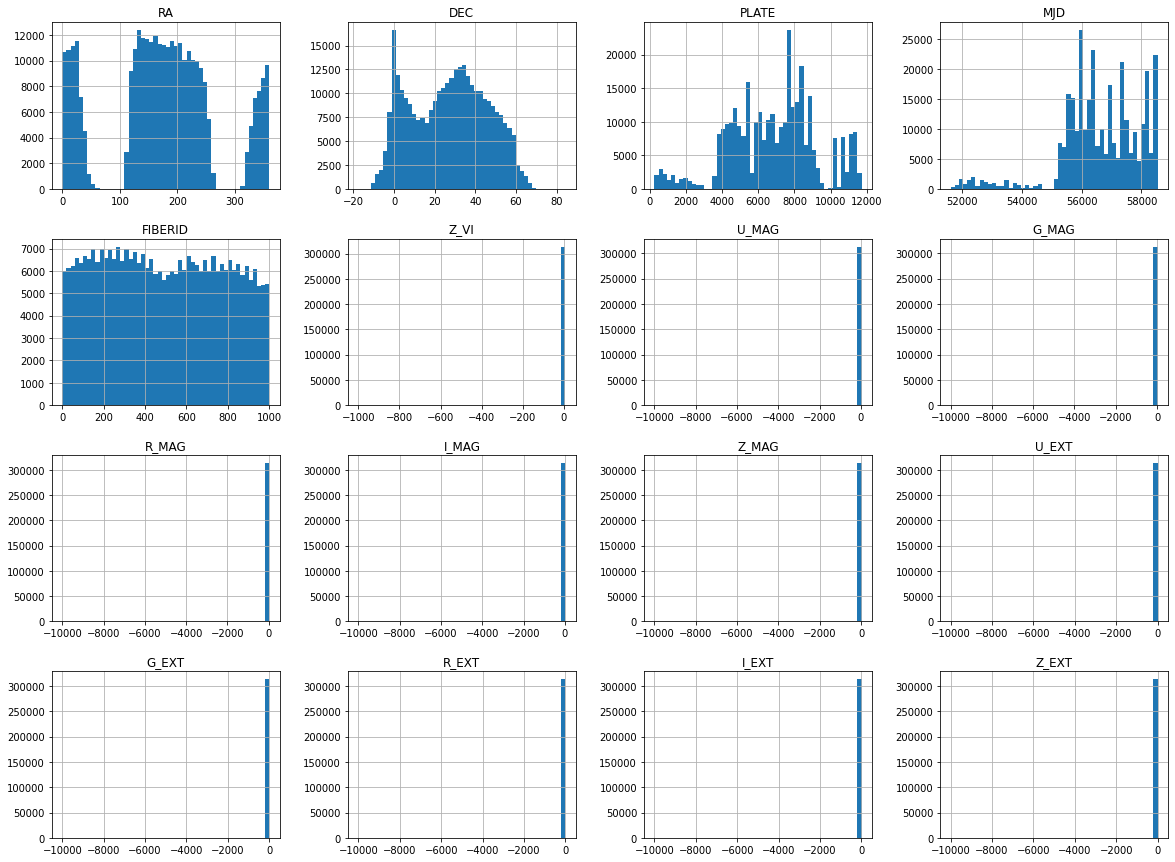

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show()

# **Cleaning the data**
This step removes the negative values from the input parameters.

In [9]:
data.drop(data.index[data['Z_VI'] <0], inplace = True)
data.drop(data.index[data['U_MAG'] <0], inplace = True)
data.drop(data.index[data['G_MAG'] <0], inplace = True)
data.drop(data.index[data['R_MAG'] <0], inplace = True)
data.drop(data.index[data['I_MAG'] <0], inplace = True)
data.drop(data.index[data['Z_MAG'] <0], inplace = True)
data.drop(data.index[data['U_EXT'] <0], inplace = True)
data.drop(data.index[data['G_EXT'] <0], inplace = True)
data.drop(data.index[data['R_EXT'] <0], inplace = True)
data.drop(data.index[data['I_EXT'] <0], inplace = True)
data.drop(data.index[data['Z_EXT'] <0], inplace = True)


# **Print the statistics to ensure that the negative values are gone**
Note that the count has significantly reduced

In [10]:
data.describe()

,RA,DEC,PLATE,MJD,FIBERID,Z_VI,U_MAG,G_MAG,R_MAG,I_MAG,Z_MAG,U_EXT,G_EXT,R_EXT,I_EXT,Z_EXT
count,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000,170466.000000
mean,176.282332,25.416759,5783.130648,56164.875658,498.640433,2.488619,21.917426,20.954953,20.785876,20.695084,20.478095,0.146775,0.114366,0.079118,0.058793,0.043731
std,87.334758,18.930382,1324.174907,577.903441,287.498580,0.492982,1.344301,0.916769,0.912304,0.926877,0.919119,0.106146,0.082708,0.057217,0.042518,0.031626
min,0.001898,-10.977895,3586.000000,55176.000000,1.000000,0.081000,16.133566,16.044903,15.844713,15.600414,15.492909,0.009832,0.007661,0.005300,0.003939,0.002930
25%,136.982714,9.284748,4702.000000,55709.000000,248.000000,2.210000,21.102986,20.399352,20.215850,20.108255,19.909212,0.075110,0.058525,0.040487,0.030087,0.022379
50%,179.046843,24.098790,5726.000000,56066.000000,496.000000,2.410000,21.863985,21.094263,20.908559,20.824047,20.567363,0.116808,0.091016,0.062965,0.046789,0.034803
75%,221.840100,41.097915,6714.000000,56430.000000,750.000000,2.729000,22.605970,21.633909,21.484969,21.407476,21.132852,0.187903,0.146413,0.101288,0.075268,0.055985
max,359.999303,68.694319,10925.000000,58289.000000,1000.000000,7.007000,27.162485,26.311369,26.588125,29.951653,24.393452,2.157665,1.681238,1.163073,0.864288,0.642871


# **Explore the correlations between output label and input parameters**

In [11]:
corr_matrix = data[['Z_VI','U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT']].corr()
corr_matrix['Z_VI'].sort_values(ascending=False)

Z_VI     1.000000
U_MAG    0.522921
G_MAG    0.109246
I_EXT    0.018063
Z_EXT    0.018063
U_EXT    0.018063
R_EXT    0.018063
G_EXT    0.018063
Z_MAG   -0.025475
I_MAG   -0.066047
R_MAG   -0.103587
Name: Z_VI, dtype: float64

# **Create attribute combinations**
Here we will create new input parameters which are actually the colors, i.e. magnitude differences.

In [12]:
data['U-G_COLOR'] = data['U_MAG'] - data['G_MAG']
data['G-R_COLOR'] = data['G_MAG'] - data['R_MAG']
data['R-I_COLOR'] = data['R_MAG'] - data['I_MAG']
data['I-Z_COLOR'] = data['I_MAG'] - data['Z_MAG']


# **Histograms of cleaned dataset**

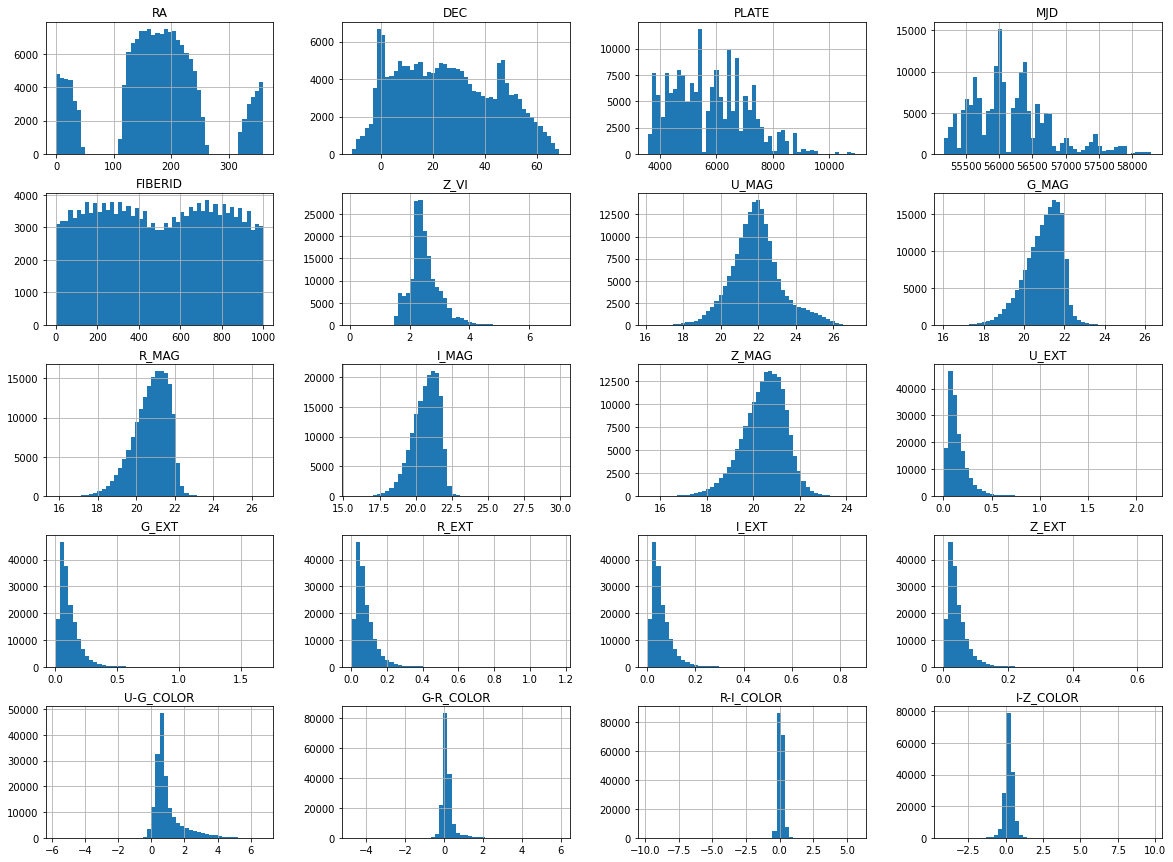

In [13]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
#from google_drive_downloader import GoogleDriveDownloader as gd
#gd.download_file_from_google_drive(file_id='1UT2BCf-IDUEpvTmcU4bq6nDcY3Ayw5vJ', dest_path='./data/stamps_noise.npy', unzip=False)
#gd.download_file_from_google_drive(file_id='1cZaMCA0z_nPX6GB_meLGouwOidEROcwc', dest_path='./data/stamps_sources.npy', unzip=False)

# **Correlations of the new data with colors**

In [15]:
corr_matrix = data[['Z_VI','U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']].corr()
corr_matrix['Z_VI'].sort_values(ascending=False)

Z_VI         1.000000
U-G_COLOR    0.697088
G-R_COLOR    0.611402
U_MAG        0.522921
G_MAG        0.109246
I_EXT        0.018063
Z_EXT        0.018063
U_EXT        0.018063
R_EXT        0.018063
G_EXT        0.018063
Z_MAG       -0.025475
I_MAG       -0.066047
R_MAG       -0.103587
I-Z_COLOR   -0.129782
R-I_COLOR   -0.171952
Name: Z_VI, dtype: float64

# **Scatter matrix to explore the correlations between parameters**

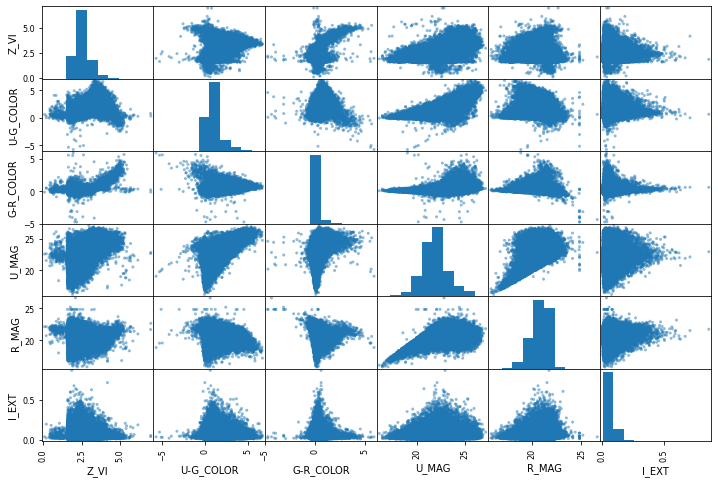

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['Z_VI','U-G_COLOR','G-R_COLOR','U_MAG','R_MAG','I_EXT']
scatter_matrix(data[attributes],figsize=(12,8))
plt.show()

# **Feature Scaling**
It is better to have the input parameters distributed between 0 and 1. Otherwise the difference in the values, for eg, in our case magnitudes are distributed around 20 and extintion values are distributed around 1. To enable the algorithm to give equal weightage to all parameters, it is  good to scale the features to a common values. 

It is recommended to distribute values between 0 and 1. Two approaches are common, MinMaxScaler and StandardScaler

MinMaxScaler : tries to make the minimum value 0 and maximum value 1 and distribute all other values accordingly. Values are shifted and rescaled so that they end up ranging from 0 and 1

StandardScaler : substracts the mean from each values and then divided by the standard deviation so that the resulting distribution has unit variance and zero mean.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']])

StandardScaler()

In [18]:
scaled_data= pd.DataFrame(scaler.transform(data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]))

# **Explore the scaled data**

In [19]:
scaled_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05,1.704660e+05
mean,2.428915e-15,1.704642e-15,5.268652e-17,-5.386696e-15,-2.507612e-16,-5.335344e-17,1.493896e-16,-9.603619e-17,2.721025e-16,1.333836e-16,-7.536173e-17,5.402036e-17,-7.202714e-17,-3.201206e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.302517e+00,-5.355833e+00,-5.416151e+00,-5.496611e+00,-5.423892e+00,-1.290140e+00,-1.290140e+00,-1.290140e+00,-1.290140e+00,-1.290140e+00,-7.755517e+00,-1.541076e+01,-5.088566e+01,-1.486980e+01
25%,-6.058484e-01,-6.060439e-01,-6.248225e-01,-6.331262e-01,-6.189459e-01,-6.751582e-01,-6.751583e-01,-6.751583e-01,-6.751583e-01,-6.751583e-01,-5.663593e-01,-4.829600e-01,-5.339066e-01,-5.033811e-01
50%,-3.975389e-02,1.519578e-01,1.344760e-01,1.391385e-01,9.712370e-02,-2.823182e-01,-2.823183e-01,-2.823183e-01,-2.823183e-01,-2.823183e-01,-3.242818e-01,-1.697517e-01,-8.867038e-02,5.130737e-03
75%,5.121964e-01,7.405985e-01,7.662961e-01,7.685963e-01,7.123771e-01,3.874701e-01,3.874700e-01,3.874702e-01,3.874701e-01,3.874700e-01,1.931394e-01,1.933796e-01,4.520760e-01,5.276035e-01
max,3.901712e+00,5.842725e+00,6.360012e+00,9.986863e+00,4.259916e+00,1.894464e+01,1.894464e+01,1.894464e+01,1.894464e+01,1.894464e+01,6.694149e+00,1.809346e+01,2.858198e+01,3.271176e+01


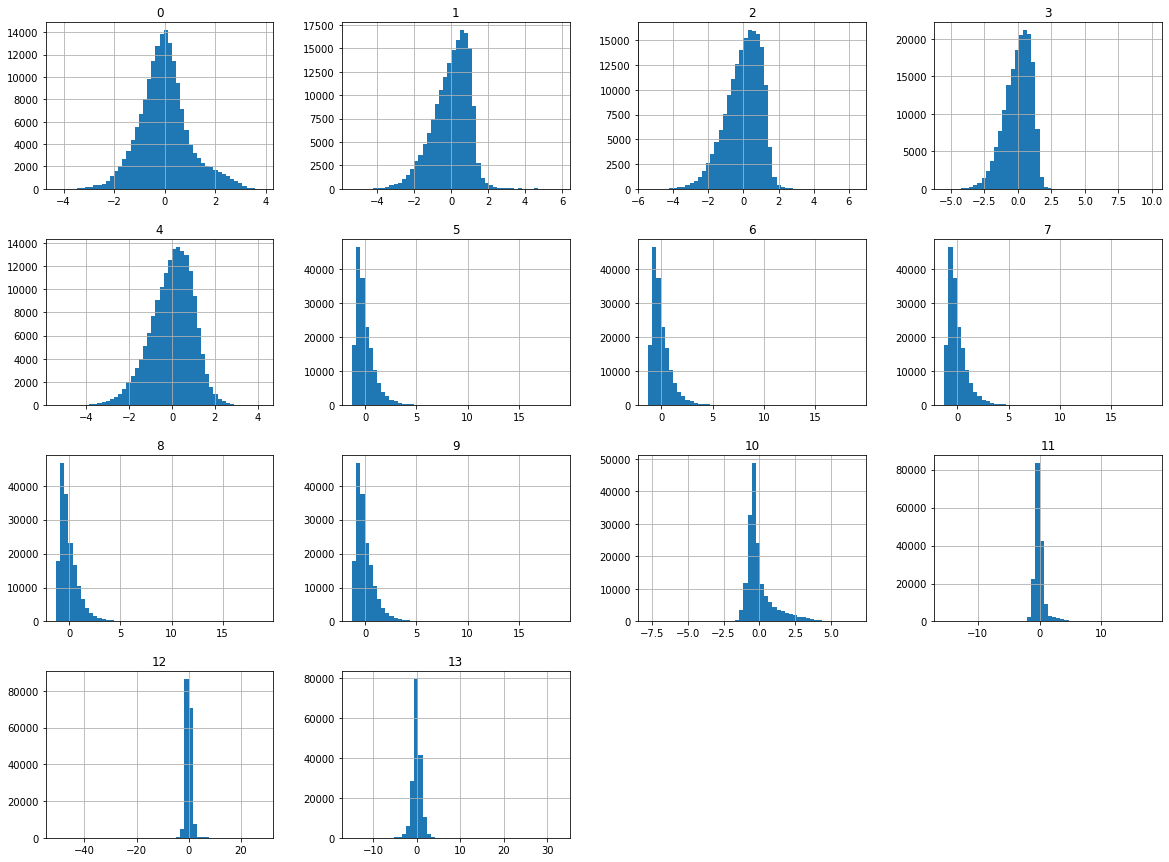

In [20]:
scaled_data.hist(bins=50,figsize=(20,15))
plt.show()

#**Note**
 We are not using the feature scaling here as we already saw that the extinction has small correlations with redshift. But, you can explore the following algorithm with scaled data and see what difference it makes. For neural networks, it is recommended to use feature scaling.

# **Copying the data to a new dataframe to exclude irrelevent features**
Excluding SDSS_NAME, RA,DEC, PLATE,MJD, FIBERID as these are not expected to influence the redshift

In [21]:
new_data = data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
new_data.head()
new_data_labels = data['Z_VI']
#photo-z_input= scaled_data

# **Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(new_data,new_data_labels)

LinearRegression()

# **Reserving some data for checking the predictions**
 Here we are allocating the first fifteen entries as the test set.
 But, ideally we should split the dataset into test set and train set and evaluate the performance on the test set.

 We will do that when we train an neural network.

In [23]:
some_data = new_data.iloc[:15]
some_data_labels = new_data_labels.iloc[:15]
print("LinReg Predictions", lin_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))

LinReg Predictions [2.09571391 2.53208464 2.39517134 2.24233734 2.33180862 3.93841916
 2.38652366 2.19997149 2.4291771  2.51258069 2.39062374 2.46574193
 2.15661794 2.54948371 2.3494606 ]
Actual Labels [2.309, 2.497, 1.619, 2.328, 2.377, 3.711, 1.576, 1.71, 2.559, 2.354, 2.165, 1.781, 2.18, 2.527, 2.795]


# **Checking the predictions**
See below that the rms error is 0.4 in redshift which is not a great solution.

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
some_data_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_data_labels,some_data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3973765076095822

# **DecisonTree Regression**
The regression is resulting in zero MSE, which means the training data and testing data is same. It is important to evaluate the score k-fold using cross-validation

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(new_data,new_data_labels)
tree_some_data_predictions = tree_reg.predict(some_data)
print("TreeReg Predictions", tree_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))
tree_mse = mean_squared_error(some_data_labels,tree_some_data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

TreeReg Predictions [2.309 2.497 1.619 2.328 2.377 3.711 1.576 1.71  2.559 2.354 2.165 1.781
 2.18  2.527 2.795]
Actual Labels [2.309, 2.497, 1.619, 2.328, 2.377, 3.711, 1.576, 1.71, 2.559, 2.354, 2.165, 1.781, 2.18, 2.527, 2.795]


0.0

# **Random Forest Regression**
#Note : This takes some time to train. be patient !!!

Note that the RandomForest Regressor actually performs better than the linear regressor. Rms error is 0.1 in Random Forest Regressor as compared to 0.4 in Linear Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(new_data,new_data_labels)
forest_some_data_predictions = forest_reg.predict(some_data)
print("ForestReg Predictions", forest_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))
forest_mse = mean_squared_error(some_data_labels,forest_some_data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

ForestReg Predictions [2.2841198 2.49494   1.7294    2.32623   2.35298   3.72328   1.8170547
 1.78109   2.49148   2.41149   2.27288   1.9120431 2.07392   2.59831
 2.59409  ]
Actual Labels [2.309, 2.497, 1.619, 2.328, 2.377, 3.711, 1.576, 1.71, 2.559, 2.354, 2.165, 1.781, 2.18, 2.527, 2.795]


0.10648343423478225

In [32]:
def display_scores(scores):
  print("RMSE Scores:", np.sqrt(-scores))
  print("RMSE Mean:",np.sqrt(-scores).mean())
  print('RMSE Std Dev:', np.sqrt(-scores).std())

# **Cross validation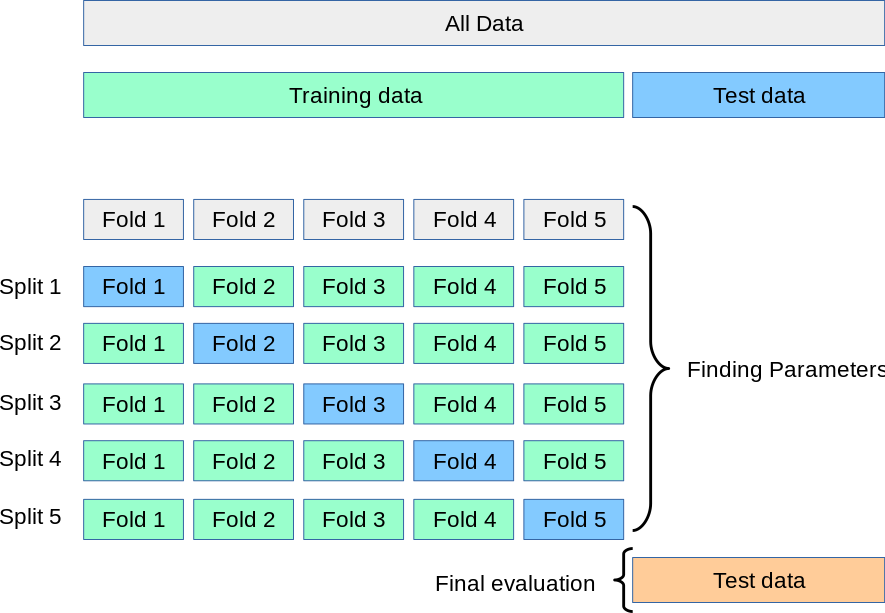**

In [35]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=5)
lin_rmse_scores=np.sqrt(-lin_scores)
#print('RMSE Scores',lin_rmse_scores)

#Cross-validation for Forest Regressor
#keep cv as minimum as it will take a lot of time to get the results otherwise
forest_scores = cross_val_score(forest_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
#print(forest_rmse_scores)
print('=='*5,"Linear Reg Scores","=="*5)
print(display_scores(lin_scores))
print('=='*5,"Forest Reg Scores","=="*5)
print(display_scores(forest_scores))

========== Linear Reg Scores ==========
RMSE Scores: [0.31704958 0.29051165 0.28745435 0.28843465 0.28937957]
RMSE Mean: 0.2945659589876204
RMSE Std Dev: 0.011287313422442925
None
========== Forest Reg Scores ==========
RMSE Scores: [0.25778183 0.21351527 0.21469378 0.21541983 0.2355615 ]
RMSE Mean: 0.22739444343711884
RMSE Std Dev: 0.01724774673753945
None


# **Cross-validation for DecisonTree**
See how the MSE now are more sensible. Earlier we got 0 MSE which is absurd. Always use cross-validation to check the robustness of the Fit.

In [39]:
tree_scores = cross_val_score(tree_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
print(tree_rmse_scores)
print('=='*5,"Tree Reg Scores","=="*5)
display_scores(tree_scores)

[0.35209064 0.30757503 0.30014163 0.30763221 0.34399133]
========== Tree Reg Scores ==========
RMSE Scores: [0.35209064 0.30757503 0.30014163 0.30763221 0.34399133]
RMSE Mean: 0.32228616903173374
RMSE Std Dev: 0.02135863897134722


# **Simple ANN to do the regression**

In [29]:
def plot_model_history(history):
    '''Plot the training and validation history for a TensorFlow network'''

    # Extract loss and accuracy
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    ax[0].plot(np.arange(n_epochs), loss, label='Training Loss')
    ax[0].plot(np.arange(n_epochs), val_loss, label='Validation Loss')
    ax[0].set_title('Loss Curves')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')

    ax[1].plot(np.arange(n_epochs), acc, label='Training Accuracy')
    ax[1].plot(np.arange(n_epochs), val_acc, label='Validation Accuracy')
    ax[1].set_title('Accuracy Curves')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')